In [201]:
# Charger les libriries qu'il faudra pour le taraitement 
import findspark    
import pandas as pd
import numpy as np
from pyspark import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml.feature import VectorAssembler 
from pyspark.sql.functions import col


In [202]:
#sc = SparkContext('local')
spark = SparkSession(sc)

In [203]:
# File location and type
file_location = "hdfs://192.168.122.206:8020/testN/EcommerceCustomers.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [204]:
df

DataFrame[Email: string, Address: string, Avatar: string, Avg Session Length: string, Time on App: string, Time on Website: string, Length of Membership: string, Yearly Amount Spent: string]

In [205]:
df.show()

+--------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|            Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|    835 Frank Tunnel|              null|              null|              null|              null|                null|               null|
|         Wrightmouth|      MI 82180-9605"|            Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|   hduke@hotmail.com|  4547 Archer Common|              null|              null|              null|              null|                null|               null|
|         Diazchester|      CA 065

In [206]:
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: string (nullable = true)
 |-- Time on App: string (nullable = true)
 |-- Time on Website: string (nullable = true)
 |-- Length of Membership: string (nullable = true)
 |-- Yearly Amount Spent: string (nullable = true)



In [207]:
df.describe().show()

+-------+------------------+-----------+------------------+------------------+------------------+------------------+--------------------+-------------------+
|summary|             Email|    Address|            Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+------------------+-----------+------------------+------------------+------------------+------------------+--------------------+-------------------+
|  count|              1000|       1000|               500|               500|               500|               500|                 500|                454|
|   mean|              null|       null|33.058900610740785|31.130461514638228|14.350284262734618| 33.95692625943925|   48.60730499130784| 499.91985771641924|
| stddev|              null|       null|0.9518717613059207| 6.128380357402919|  7.32783840726642| 9.787360915468765|   144.2169189098249|   78.3257926883325|
|    min|APO AA 17032-7944"|  AK 05665"|30.879484344

In [208]:

df.select('Yearly Amount Spent').show()

+-------------------+
|Yearly Amount Spent|
+-------------------+
|               null|
|  587.9510539684005|
|               null|
|  392.2049334443264|
|               null|
| 487.54750486747207|
|               null|
|  581.8523440352178|
|               null|
|  599.4060920457634|
|               null|
|   637.102447915074|
|               null|
|  521.5721747578274|
|               null|
|               null|
|               null|
|  570.2004089636195|
|               null|
|               null|
+-------------------+
only showing top 20 rows



In [209]:
#test = df.select('Email','Address','Avatar')
#test.show()

In [210]:
# supprimer les colonnes non importantes pour la correlation 

dfm = df.drop('Email','Address','Avatar')

In [211]:
dfm.show()

+------------------+------------------+------------------+--------------------+-------------------+
|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+------------------+------------------+------------------+--------------------+-------------------+
|              null|              null|              null|                null|               null|
| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|              null|              null|              null|                null|               null|
|31.926272026360156|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|              null|              null|              null|                null|               null|
|33.000914755642675|11.330278057777512| 37.11059744212085|   4.104543202376424| 487.54750486747207|
|              null|              null|              null|                null|               null|


In [212]:
# supprimer les valeurs null
dfn = dfm.na.drop()

In [213]:
dfn.show()

+------------------+------------------+------------------+--------------------+-------------------+
|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+------------------+------------------+------------------+--------------------+-------------------+
| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|31.926272026360156|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|33.000914755642675|11.330278057777512| 37.11059744212085|   4.104543202376424| 487.54750486747207|
| 34.30555662975554|13.717513665142508| 36.72128267790313|  3.1201787827480914|  581.8523440352178|
| 33.33067252364639|12.795188551078114| 37.53665330059473|   4.446308318351435|  599.4060920457634|
| 33.87103787934198|12.026925339755058| 34.47687762925054|   5.493507201364199|   637.102447915074|
| 32.02159550138701|11.366348309710526|36.683776152869605|  4.6850172465709115|  521.5721747578274|


In [214]:
# Renomer les variables 

dfn = dfn.withColumnRenamed('Avg Session Length','AvgSessionLength')
dfn = dfn.withColumnRenamed('Time on App','TimeonApp')
dfn = dfn.withColumnRenamed('Time on Website','TimeonWebsite')
dfn = dfn.withColumnRenamed('Length of Membership','LengthofMembership')
dfn = dfn.withColumnRenamed('Yearly Amount Spent','YearlyAmountSpent')

In [215]:
#Convertir les strings en double 

dfnum = dfn.select(*(col(i).cast("double") for i in dfn.columns))
dfnum.printSchema()

root
 |-- AvgSessionLength: double (nullable = true)
 |-- TimeonApp: double (nullable = true)
 |-- TimeonWebsite: double (nullable = true)
 |-- LengthofMembership: double (nullable = true)
 |-- YearlyAmountSpent: double (nullable = true)



In [216]:
feature_columns= dfnum.drop('YearlyAmountSpent')
feature_columns.show()

+------------------+------------------+------------------+------------------+
|  AvgSessionLength|         TimeonApp|     TimeonWebsite|LengthofMembership|
+------------------+------------------+------------------+------------------+
| 34.49726772511229|12.655651149166752| 39.57766801952616| 4.082620632952961|
|31.926272026360156|11.109460728682564|37.268958868297744|  2.66403418213262|
|33.000914755642675|11.330278057777512| 37.11059744212085| 4.104543202376424|
| 34.30555662975554|13.717513665142508| 36.72128267790313|3.1201787827480914|
| 33.33067252364639|12.795188551078114| 37.53665330059473| 4.446308318351435|
| 33.87103787934198|12.026925339755058| 34.47687762925054| 5.493507201364199|
| 32.02159550138701|11.366348309710526|36.683776152869605|4.6850172465709115|
| 33.98777289568564|13.386235275676434|37.534497341555735|3.2734335777477144|
| 33.99257277495374|13.338975447662111| 37.22580613162114|2.4826077705105956|
|29.532428967057946|10.961298400154098| 37.42021557502538| 4.046

In [217]:
#feature_columns = dfnum.columns[:-1]
#feature_columns

In [218]:
assembler = VectorAssembler(inputCols=feature_columns.columns,outputCol="features")

In [219]:
data= assembler.transform(dfnum)

In [220]:
data.show()

+------------------+------------------+------------------+------------------+------------------+--------------------+
|  AvgSessionLength|         TimeonApp|     TimeonWebsite|LengthofMembership| YearlyAmountSpent|            features|
+------------------+------------------+------------------+------------------+------------------+--------------------+
| 34.49726772511229|12.655651149166752| 39.57766801952616| 4.082620632952961| 587.9510539684005|[34.4972677251122...|
|31.926272026360156|11.109460728682564|37.268958868297744|  2.66403418213262| 392.2049334443264|[31.9262720263601...|
|33.000914755642675|11.330278057777512| 37.11059744212085| 4.104543202376424|487.54750486747207|[33.0009147556426...|
| 34.30555662975554|13.717513665142508| 36.72128267790313|3.1201787827480914| 581.8523440352178|[34.3055566297555...|
| 33.33067252364639|12.795188551078114| 37.53665330059473| 4.446308318351435| 599.4060920457634|[33.3306725236463...|
| 33.87103787934198|12.026925339755058| 34.4768776292505

In [221]:
trainData, testData = data.randomSplit([.7,.3])

In [222]:
# On doit convetir toutes les fonctionnalités en un seul vecteur, en utilisant un assembleur de vecteurs

#assembler = VectorAssembler(inputCols=dfnum.columns, outputCol = 'features')
#output = assembler.transform(dfnum).select('YearlyAmountSpent', 'features')
#output.show(28, truncate = False)

In [223]:
#trainData, testData = output.randomSplit([.8,.2])

In [224]:
from pyspark.ml.regression import LinearRegression

In [225]:
algo = LinearRegression(featuresCol="features", labelCol="YearlyAmountSpent")

In [226]:
model = algo.fit(trainData)

In [227]:
evaluation_summary = model.evaluate(testData)

In [228]:
predictions = model.transform(testData)

In [229]:
predictions.select(predictions.columns[-3:]).show()

+------------------+--------------------+------------------+
| YearlyAmountSpent|            features|        prediction|
+------------------+--------------------+------------------+
| 442.0644137580656|[30.5743636841713...|442.14921736093015|
| 448.9332932076743|[31.0662181616375...| 461.9021172648038|
| 557.2526867470547|[31.1280900496166...| 564.9440313091104|
| 432.7207178399336|[31.3091926408918...| 429.8409110648058|
|495.17595044947535|[31.3584771924370...|491.35757049984386|
|  418.602742095224|[31.4474464941278...|426.83843504850756|
| 489.8124879964614|[31.5147378578019...| 496.9082639928015|
| 544.4092721605869|[31.5741380228732...| 558.6820108590741|
| 541.2265839893283|[31.5761319713222...| 543.3172787818919|
| 444.5455496511082|[31.6098395733896...| 427.7760540568647|
| 376.3369007569242|[31.6253601348306...|382.07199742123385|
|416.35835357990084|[31.6610498227460...| 417.5350736488542|
|  538.774933478023|[31.7207699002873...| 546.4694444138559|
|503.38788728796044|[31.

In [230]:
evaluation_summary.residuals.show()
print("RMSE: %f" % evaluation_summary.rootMeanSquaredError)
print("r2: %f" % evaluation_summary.r2)

+-------------------+
|          residuals|
+-------------------+
|-0.0848036028645538|
|-12.968824057129495|
| -7.691344562055747|
|  2.879806775127804|
|  3.818379949631492|
| -8.235692953283547|
|  -7.09577599634008|
|-14.272738698487274|
|-2.0906947925635677|
| 16.769495594243494|
| -5.735096664309651|
|-1.1767200689533865|
| -7.694510935832909|
| -6.194720449698707|
|  3.163992132740759|
| -5.527689882251309|
|-18.279590255721587|
| -1.794936729400149|
| -9.762592664439069|
|-17.476209421432543|
+-------------------+
only showing top 20 rows

RMSE: 9.781957
r2: 0.983314


In [231]:
import matplotlib.pyplot as plt
import numpy as np

In [233]:
beta = np.sort(model.coefficients)

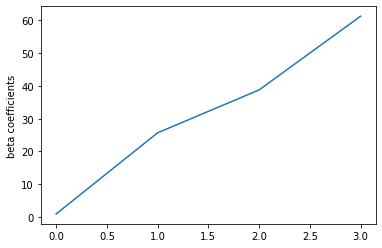

In [236]:
plt.plot (beta)
plt.ylabel ('beta coefficients')
plt.show ()